In [6]:
import numpy as np
import pandas as pd
import zipfile
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots




In [12]:
path_country = './test.csv'
country = pd.read_csv(path_country)


In [14]:
country.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [18]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
    # do something with the DataFrame, for example print the first 5 rows
print(train.head())
    

  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True  


In [19]:
# initialize a new DataFrame to hold the split values
values = pd.DataFrame()

# split the Cabin column into deck, num, and side columns
values[['deck', 'num', 'side']] = train['Cabin'].str.split('/', expand=True)

# print the resulting DataFrame
print(values.head())

  deck num side
0    B   0    P
1    F   0    S
2    A   0    S
3    A   0    S
4    F   1    S


In [20]:
train = train.join(values, rsuffix='_split')

In [21]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,deck,num,side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S


In [22]:
# train.isna()
# train.describe()
# print(train.isnull().sum())
# train.info()
train['num'].value_counts()

82      28
86      22
19      22
56      21
176     21
        ..
1644     1
1515     1
1639     1
1277     1
1894     1
Name: num, Length: 1817, dtype: int64

<AxesSubplot:>

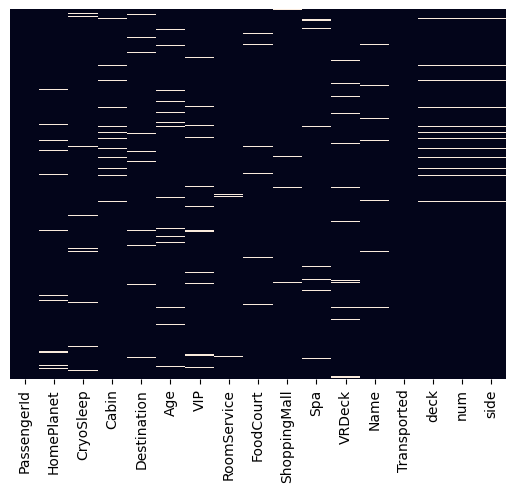

In [23]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

In [24]:
train.drop(['num', 'Cabin', 'Name'], axis=1, inplace=True)
train['Age']=train['Age'].fillna(train['Age'].mean())
train['RoomService']=train['RoomService'].fillna(train['RoomService'].mean())
train['FoodCourt']=train['FoodCourt'].fillna(train['FoodCourt'].mean())
train['ShoppingMall']=train['ShoppingMall'].fillna(train['ShoppingMall'].mean())
train['Spa']=train['Spa'].fillna(train['Spa'].mean())
train['VRDeck']=train['VRDeck'].fillna(train['VRDeck'].mean())
train['CryoSleep']=train['CryoSleep'].fillna(train['CryoSleep'].mode()[0])
train['VIP']=df['VIP'].fillna(train['VIP'].mode()[0])
train['HomePlanet']=train['HomePlanet'].fillna(train['HomePlanet'].mode()[0])
train['Destination']=train['Destination'].fillna(train['Destination'].mode()[0])
train['deck']=train['deck'].fillna(train['deck'].mode()[0])
train['side']=train['side'].fillna(train['side'].mode()[0])

NameError: name 'df' is not defined

<AxesSubplot:>

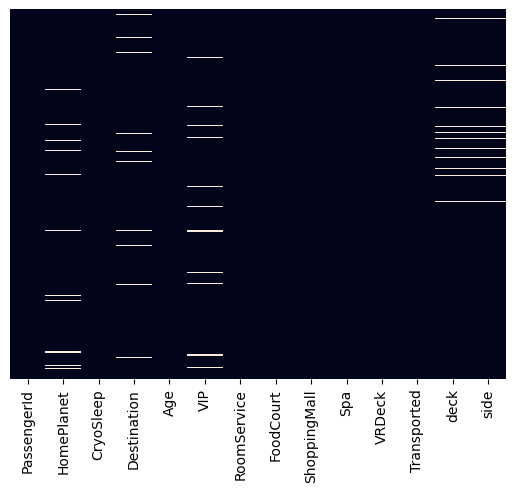

In [25]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)